# MATPLOTLIB ASSIGNMENT


Q.1) We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Temperature')

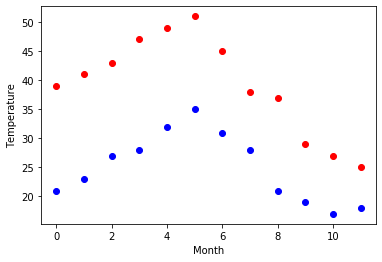

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Temperature')


In [13]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset): # a0 + A1*cos(t+phi)*2pie/t.max
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max) # gives optimal values,covariance 

res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min)


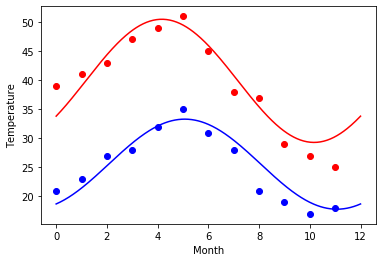

In [3]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro') # plot scatter plot and then fit it
plt.plot(days, yearly_temps(days, *res_max), 'r-') # fiting plot with cosine function
plt.plot(months, temp_min, 'bo') # plot scatter plot of min temp
plt.plot(days, yearly_temps(days, *res_min), 'b-') # fitting temp max data into cosine curve using optimal data
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()


Q.2) This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

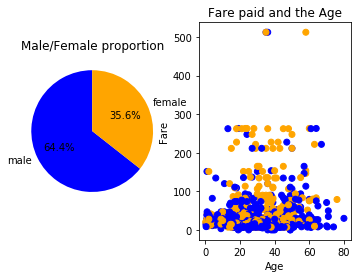

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pie chart presenting the male/female proportion
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()
count = titanic['sex'].value_counts()
count.values.tolist() # male-843,female-466 hence op-[843,466]
count.index.values.tolist()
colors = ['blue', 'orange']
f, (ax1, ax2) = plt.subplots(1,2)#creat subplots with 1 Row And 2 Col, Create figure
ax1.pie(count.values.tolist(), labels = count.index.values.tolist(), colors=colors, startangle=90, autopct='%.1f%%')
ax1.set_title('Male/Female proportion')

# scatter plot of fare and age with c as sex data

titanic = titanic.dropna(subset = ["sex"]) # as there is nan value, have to drop it 
colors = {'male':'blue', 'female':'orange'}
ax2.scatter(titanic.age,titanic.fare,c = titanic['sex'].iloc[:1310].apply(lambda x: colors[x]))
ax2.set_xlabel('Age')
ax2.set_ylabel('Fare')
ax2.set_title('Fare paid and the Age')
plt.show()